In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data.shape

(768, 10)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
features = data.iloc[:,:-2]
prediction = data.iloc[:,-2:]

In [8]:
features.head()


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [9]:
prediction.head()


,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)
feature_scaled = pd.DataFrame(feature_scaled,columns=features.columns)
feature_scaled.head()
 

,X1,X2,X3,X4,X5,X6,X7,X8
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_scaled,prediction,test_size=0.2,random_state=42,shuffle=True)

In [12]:
Train_data = pd.concat([x_train,y_train],axis='columns',names=[features.columns,prediction.columns])
Train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
60,0.528182,-0.672602,0.000000,-0.655880,1.0,-1.341641,-1.009323,-1.169393,23.53,27.31
618,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,-0.524211,18.90,22.09
346,0.906580,-0.950920,-0.561951,-0.655880,1.0,0.447214,0.117363,-0.524211,29.27,29.90
294,1.284979,-1.229239,0.000000,-1.198678,1.0,0.447214,0.117363,-1.169393,32.84,32.71
231,-0.985413,0.997307,0.000000,0.972512,-1.0,1.341641,-1.009323,0.766154,11.43,14.83


In [13]:
Train_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.023547,0.024100,0.007322,0.019964,-0.016287,0.010197,0.007875,-0.008275,22.155033,24.410765
std,0.997305,1.001505,0.993988,0.996094,1.000683,0.991593,1.007649,1.001263,10.054280,9.476566
min,-1.363812,-1.785875,-1.685854,-1.470077,-1.000000,-1.341641,-1.760447,-1.814575,6.010000,10.900000
25%,-0.985413,-0.672602,-0.561951,-0.655880,-1.000000,-0.447214,-1.009323,-1.008097,12.977500,15.640000
50%,-0.228616,0.162352,0.000000,0.972512,-1.000000,0.447214,0.117363,0.120972,18.250000,21.500000
75%,0.528182,0.997307,0.561951,0.972512,1.000000,0.447214,1.244049,0.766154,31.545000,32.920000
max,2.041777,1.553943,2.247806,0.972512,1.000000,1.341641,1.244049,1.411336,43.100000,48.030000


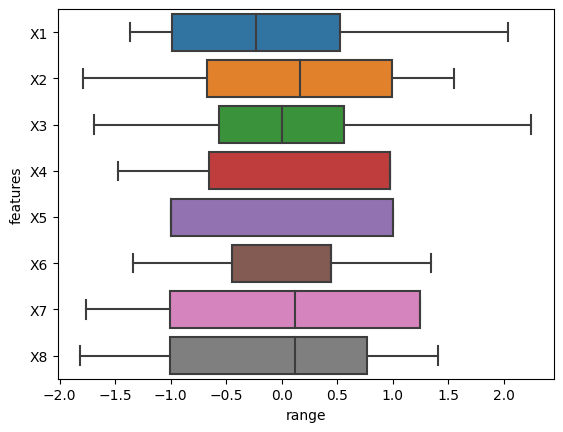

In [29]:
import seaborn as sns
sns.boxplot(data=x_train,orient="h").set(xlabel ='range',ylabel = 'features')
plt.show()

In [15]:
cor_mat = Train_data.corr(method='pearson')
cor_mat

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991923,-0.211912,-0.870389,0.831108,-0.003444,0.009575,0.001160,0.629314,0.642148
X2,-0.991923,1.000000,0.204776,0.881746,-0.860752,0.005307,-0.012996,-0.001782,-0.664684,-0.679988
X3,-0.211912,0.204776,1.000000,-0.281167,0.267395,0.014898,-0.019823,-0.012122,0.439092,0.410905
X4,-0.870389,0.881746,-0.281167,1.000000,-0.972779,-0.001977,-0.003189,0.004095,-0.863294,-0.864714
X5,0.831108,-0.860752,0.267395,-0.972779,1.000000,-0.007185,0.003697,-0.007357,0.889154,0.894927
X6,-0.003444,0.005307,0.014898,-0.001977,-0.007185,1.000000,0.029363,0.010337,0.001772,0.008773
X7,0.009575,-0.012996,-0.019823,-0.003189,0.003697,0.029363,1.000000,0.206917,0.276184,0.212642
X8,0.001160,-0.001782,-0.012122,0.004095,-0.007357,0.010337,0.206917,1.000000,0.080206,0.041308
Y1,0.629314,-0.664684,0.439092,-0.863294,0.889154,0.001772,0.276184,0.080206,1.000000,0.976316
Y2,0.642148,-0.679988,0.410905,-0.864714,0.894927,0.008773,0.212642,0.041308,0.976316,1.000000


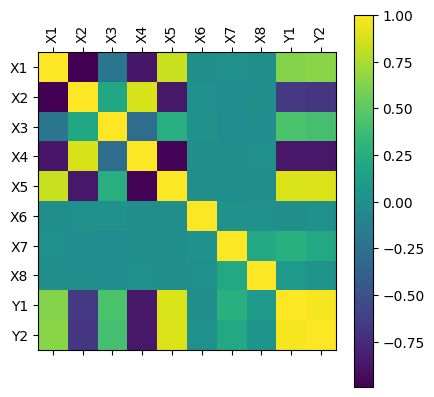

In [16]:
plt.matshow(cor_mat)
plt.xticks(range(len(cor_mat.columns)),cor_mat.columns,rotation=90)
plt.yticks(range(len(cor_mat.columns)),cor_mat.columns)
plt.colorbar()
plt.show()

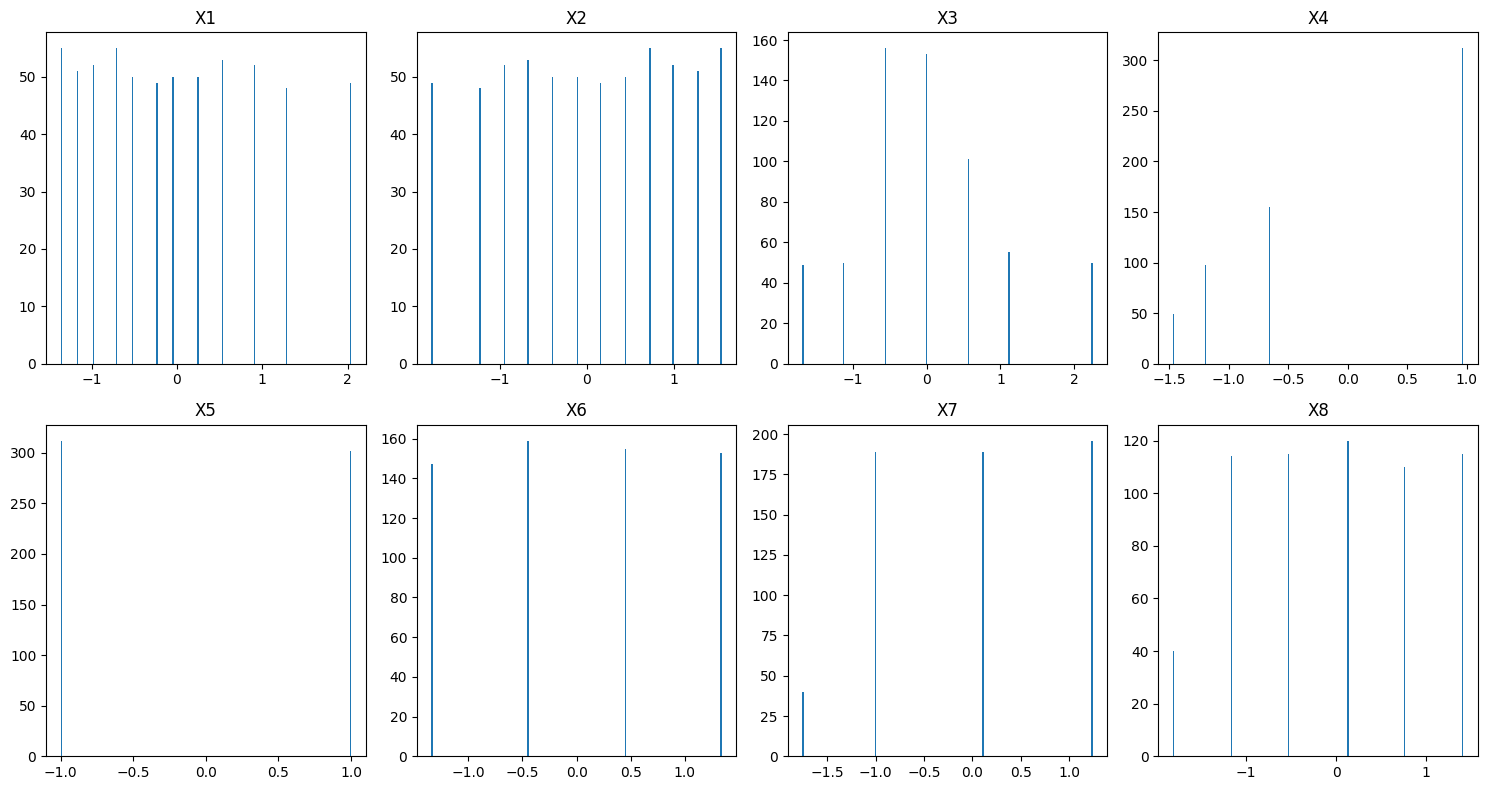

In [17]:
fig, axs = plt.subplots(2,4, figsize=(15,8))
axs = axs.flatten()

for i,col in enumerate(Train_data.columns[:-2]):
    axs[i].hist(Train_data[col],bins=200)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [18]:
unique_values =Train_data.nunique()
print(unique_values)

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    490
Y2    526
dtype: int64


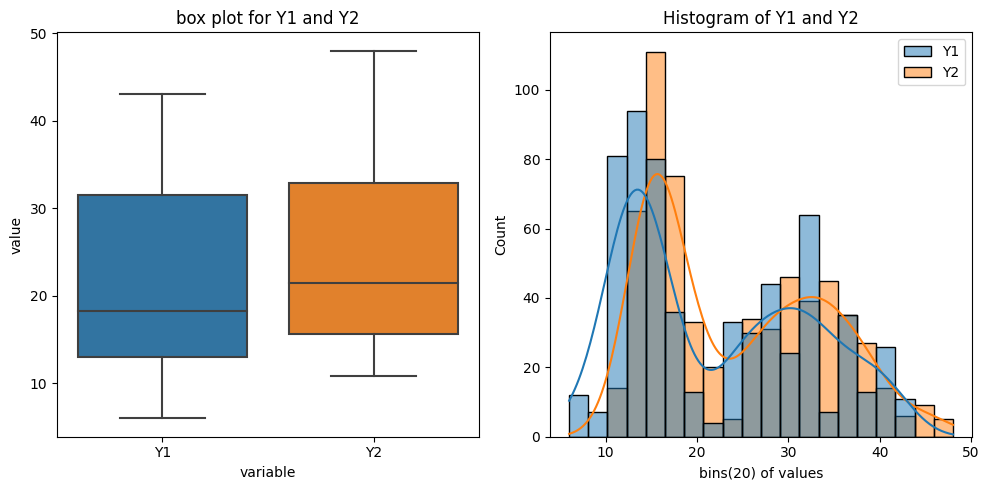

In [19]:
fig, axs = plt.subplots(1,2,figsize =(10,5))
axs =axs.flatten()

sns.boxplot(x="variable",y="value",data=pd.melt(Train_data[["Y1","Y2"]]),ax=axs[0])
axs[0].set_title("box plot for Y1 and Y2")

sns.histplot(data=Train_data[["Y1","Y2"]],ax=axs[1],bins=20,kde=True)
axs[1].set(xlabel='bins(20) of values')
axs[1].set_title("Histogram of Y1 and Y2")

plt.tight_layout()
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsRegressor
model = knn = KNeighborsRegressor(n_neighbors=7)

model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred=model.predict(x_test)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse_train = mean_squared_error(y_train,y_pred_train)
mae_train =mean_absolute_error(y_train,y_pred_train)
r2_train = r2_score(y_train,y_pred_train)

print("Evaluation metrices: Train Data")
print("Mean Absolute Error",mae_train)
print("Mean Squared error",mse_train)
print("r2 score",r2_train)

Evaluation metrices: Train Data
Mean Absolute Error 1.4883317822242907
Mean Squared error 4.873263079173042
r2 score 0.948331263512322


In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse_test = mean_squared_error(y_test,y_pred)
mae_test =mean_absolute_error(y_test,y_pred)
r2_test = r2_score(y_test,y_pred)

print("Evaluation metrices: test Data")
print("Mean Absolute Error",mae_test)
print("Mean Squared error",mse_test)
print("r2 score",r2_test)

Evaluation metrices: test Data
Mean Absolute Error 1.6206808905380337
Mean Squared error 6.213902031804929
r2 score 0.9362373200742524


In [23]:
x_train_selected = x_train.drop(['X6','X8'],axis=1,inplace=False)
x_test_selected = x_test.drop(['X6','X8'],axis=1,inplace=False)

In [24]:
model_selected = knn = KNeighborsRegressor(n_neighbors=7)

model_selected.fit(x_train_selected,y_train)
y_pred_train_selected = model_selected.predict(x_train_selected)
y_pred_test_selected = model_selected.predict(x_test_selected)


In [25]:
r2_train_selected=r2_score(y_train,y_pred_train_selected)
print("Train score after feature selection",r2_train_selected)
r2_test_selected=r2_score(y_test,y_pred_test_selected)
print("test score after feature selection",r2_test_selected)

Train score after feature selection 0.9773864030583985
test score after feature selection 0.9751364974255159


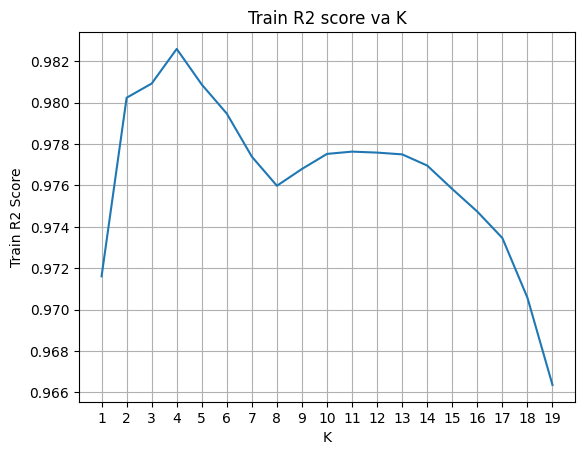

In [26]:
k_values = list(range(1,20))
model_best = KNeighborsRegressor()
r2_values,mse_values =[],[]
for k in k_values:
    model_best.set_params(n_neighbors=k)
    model_best.fit(x_train_selected,y_train)
    y_pred_current = model_best.predict(x_train_selected)
    r2_current = r2_score(y_train,y_pred_current)
    r2_values.append(r2_current)
    mse_current = mean_squared_error(y_train,y_pred_current)
    mse_values.append(mse_current)

plt.plot(k_values,r2_values)
plt.title("Train R2 score va K")
plt.xlabel("K")
plt.ylabel("Train R2 Score")
plt.xticks(k_values)
plt.grid()
plt.show()


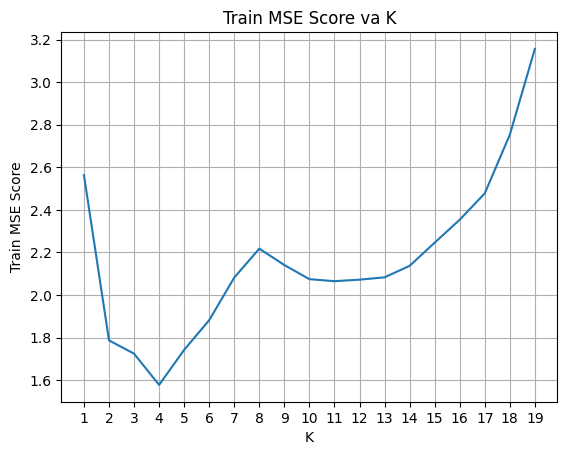

In [27]:
plt.plot(k_values,mse_values)
plt.title("Train MSE Score va K")
plt.xlabel("K")
plt.ylabel("Train MSE Score")
plt.xticks(k_values)
plt.grid()
plt.show()

In [28]:
k_best = k_values[np.argmax(r2_values)]
model_best.set_params(n_neighbors=k_best)
model_best.fit(x_train_selected,y_train)
y_train_pred_best = model_best.predict(x_train_selected)
y_test_pred_best = model_best.predict(x_test_selected)
r2_best_train= r2_score(y_train,y_train_pred_best)
r2_best_test = r2_score(y_test,y_test_pred_best)

print("Best K: ",k_best)
print("Train R2 Score",r2_best_train)
print("Test R2 Score ",r2_best_test)

Best K:  4
Train R2 Score 0.9825926594522585
Test R2 Score  0.9747044238990149
